In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
df = pd.read_csv("breast_cancer.csv")

In [27]:
df.columns

Index([u'Unnamed: 0', u'id number', u'clump_thickness',
       u'uniformity_of_cell_size', u'uniformity_of_cell_shape',
       u'marginal_adhesion', u'epithelial_cell_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'malignant'],
      dtype='object')

In [28]:
df.describe()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,349.000000,1071704.098712,4.417740,3.134478,3.207439,2.806867,3.216023,3.440629,3.437768,2.866953,1.589413,0.344778
std,201.928205,617095.729819,2.815741,3.051459,2.971913,2.855379,2.214300,3.665507,2.438364,3.053634,1.715078,0.475636
min,0.000000,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000
25%,174.500000,870688.500000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,349.000000,1171710.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,523.500000,1238298.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,698.000000,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [29]:
# drop unnamed & id columns because they don't say much about breast cancer
df = df.drop(['Unnamed: 0', 'id number'], axis=1)

In [30]:
# check if columns got dropped
df.columns

Index([u'clump_thickness', u'uniformity_of_cell_size',
       u'uniformity_of_cell_shape', u'marginal_adhesion',
       u'epithelial_cell_size', u'bare_nuclei', u'bland_chromatin',
       u'normal_nucleoli', u'mitoses', u'malignant'],
      dtype='object')

In [31]:
y = df.pop("malignant")

In [32]:
df.columns

Index([u'clump_thickness', u'uniformity_of_cell_size',
       u'uniformity_of_cell_shape', u'marginal_adhesion',
       u'epithelial_cell_size', u'bare_nuclei', u'bland_chromatin',
       u'normal_nucleoli', u'mitoses'],
      dtype='object')

### Single Holdout / Grid Search

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=42)

In [34]:
n_estimators = [100,250,500, 1000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,10,50, 100]


rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [35]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 10, 50, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 250, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [36]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
best_rfc = estimator.best_estimator_

### AUC, Accuracy, Precision, and Recall.

In [38]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.971428571429


In [39]:
y_hat = best_rfc.predict(X_test)

In [40]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)
        

0.971428571429


In [41]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98        95
          1       0.94      0.98      0.96        45

avg / total       0.97      0.97      0.97       140



In [42]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[92  3]
 [ 1 44]]


**Precision:**  44 / 44 + 3 = .94

**Recall:**   44 / 44 + 1 = .98

In [44]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.99298245614


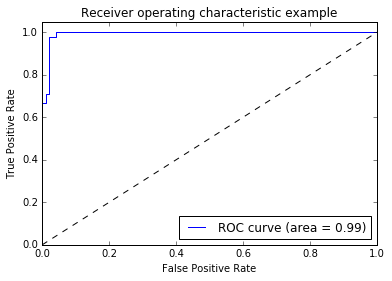

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### K-Fold Validation

In [47]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, df, y, cv=10)